# UTN.BA
## Ciencia de Datos
### Grupo 13
#### Analisis de dataset blablalba


In [116]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import datetime as DT
#PCA y Silhouette
from sklearn.decomposition import PCA
from  sklearn.metrics import silhouette_score
#Librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [2]:
#IMPORTMOS EL DATASET
tp = pd.read_csv(r'Ecommerce ABI Enriched.csv', delimiter=',', low_memory= 'false')

C:\Users\avelurta\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (21,29,47,62,68,74,82,84,91,103,104,112,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### EDA inicial sobre la forma del dataset

In [3]:
#CHEQUEAMOS CUANTAS FILAS Y COLUMNAS TIENE
tp.head(30)
tp.shape

(359388, 141)

In [115]:
#DETALLE DE COLUMNAS
tp.columns

Index(['age', 'birth_date', 'birth_date_day', 'birth_date_month',
       'birth_date_year', 'channel', 'city', 'complement', 'country',
       'created_in',
       ...
       'ideal_glass', 'fermentation', 'style', 'category', 'subcategory',
       'country_of_production', 'is_abi', 'source_schema', 'food_pairing_tip',
       'time.1'],
      dtype='object', length=141)

In [5]:
#Vemos que columnas tienen nulls
tp.isnull().sum()

age                            359388
birth_date                     359388
birth_date_day                 359388
birth_date_month               359388
birth_date_year                359388
channel                        359388
city                           359388
complement                     359388
country                             0
created_in                          0
creation_brand                      0
district                       359388
document_id                    359388
document_id_unify              359388
email                          359388
emails                         359388
facebook_id                    359388
first_name                     359388
full_name                      359388
gender                         359388
id                                  0
id_1                           133049
identification_number          359388
identification_number_unify    359388
is_employee                    359388
last_name                      359388
mobile_numbe

## Conclusion: Tenemos un dataset con casi 360000 samples, pero gran parte de ellas estan en null o parecen ser features repetidas

In [131]:
#Borramos todas las columnas que no sirven
tpf1 = tp.drop(['age','birth_date','birth_date_day','birth_date_month','birth_date_year','created_in','channel','city','complement','district','document_id','document_id_unify','email','emails','facebook_id','first_name','full_name','country_of_production',
       'food_pairing_tip','width','time', 'ideal_glass','table_origin','td_id', 'fermentation','origin_score',
       'style','ideal_temperature', 'local_subcategory', 'is_bundle', 'volume','source_system',
       'abv', 'units_per_sku','length','creation_brand', 'country_of_origin','height','business_name',
       'is_active','identification_number','source','title','td_id','system','currency',
       'identification_number_unify', 'is_employee','last_name','product_spk','business_spk',
       'mobile_number','neighborhood','number','phone_number','state','street','td_global_id',
       'time_creation', 'twitter_id','department','item_id', 'order_status_type','uniqueid', 'zipcode', 'cuit_cuil',
       'dni', 'id_2', 'id_3','gender', 'id_1','unit_discount_local','td_id.1','customer_first_order_period','customer_first_order_year',
       'unit_delivery_cost_local', 'is_incomplete', 'coupon_code','unit_tax_usd','unit_tax_local',
       'order_rating','unit_subtotal_charged_usd','delivery_type',
       'unit_subtotal_charged_local', 'unit_delivery_cost_usd', 'order_type',
       'unit_product_cost_local','unit_margin_usd','product_url','is_test','unit_product_cost_usd',
       'unit_margin_local', 'unit_volume','description', 'body', 'local_category', 'date_retired',
       'is_returnable_glass_bottle', 'ean', 'row_updated_at', 'brand_category','elegible_discount_spk','delivery_address_spk','discount_name','operator_nk','discount_spk','image_url','upc','opt_in','id_4','weight','source_schema','is_abi','time.1','product_nk'], axis = 1)

In [132]:
#Vemos cuantas filas y columnas quedaron
tpf1.shape

(359388, 27)

In [133]:
#Vemos cuantos registros tienen nulls
tpf1.isnull().sum()


country                            0
id                                 0
unit_discount_usd                  0
customer_first_order_date          0
unit_gross_revenue_local           0
unit_delivery_charged_usd          0
unit_net_revenue_usd               0
order_date                         0
order_status                       0
customer_spk                       0
unit_price_charged_local           0
unit_gross_revenue_usd             0
source_system_order_id             0
unit_delivery_charged_local        0
rate_local_do_usd                  0
quantity                           0
unit_price_charged_usd             0
unit_net_revenue_local             0
order_days_after_first_order       0
order_time                         0
row_created_at                     0
sku                              616
brand                           2520
date_created                    2333
name                               0
category                        4954
subcategory                     4954
d

In [134]:
#Separamos la columa order_date en año,mes y dia
tpf1.order_date = pd.to_datetime(tpf1.order_date)
tpf1['year'] = tpf1.order_date.dt.year 
tpf1['month'] = tpf1.order_date.dt.month 
tpf1['day'] = tpf1.order_date.dt.day 
#Pasamos el order_time a datetime
tpf1['order_time'] =  pd.to_datetime(tpf1['order_time'], format='%H:%M:%S')
tpf1.head()

,country,id,unit_discount_usd,customer_first_order_date,unit_gross_revenue_local,unit_delivery_charged_usd,unit_net_revenue_usd,order_date,order_status,customer_spk,...,row_created_at,sku,brand,date_created,name,category,subcategory,year,month,day
0,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.0000,2018-04-18,884.6936,0.1707,1.3421,2018-04-18,canceled,cl_casadelacerveza;ded0f554dbb2f3381acf862ad69...,...,2018-08-20 05:55:44.844529,69,Goose Island,2018-04-05 10:45:09.088888,Pack Degustación Goose Island + Vaso,unknown,unknown,2018,4,18
1,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.2652,2018-04-18,722.7899,0.1708,1.0965,2018-04-18,invoiced,cl_casadelacerveza;ded0f554dbb2f3381acf862ad69...,...,2018-08-20 05:55:44.844529,69,Goose Island,2018-04-05 10:45:09.088888,Pack Degustación Goose Island + Vaso,unknown,unknown,2018,4,18
2,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.0000,2018-04-18,1129.6857,0.2179,1.7138,2018-04-18,canceled,cl_casadelacerveza;ded0f554dbb2f3381acf862ad69...,...,2018-06-08 05:39:56.779021,50,Lowenbrau,2018-04-05 10:45:36.799491,Cerveza Lowenbrau Oktoberfest Botella,Beer,unknown,2018,4,18
3,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.3382,2018-04-18,921.6156,0.2178,1.3981,2018-04-18,invoiced,cl_casadelacerveza;ded0f554dbb2f3381acf862ad69...,...,2018-06-08 05:39:56.779021,50,Lowenbrau,2018-04-05 10:45:36.799491,Cerveza Lowenbrau Oktoberfest Botella,Beer,unknown,2018,4,18
4,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.0000,2018-04-18,1046.8875,0.2019,1.5882,2018-04-18,canceled,cl_casadelacerveza;ded0f554dbb2f3381acf862ad69...,...,2018-08-20 07:30:23.707858,449,unknown,2018-05-21 13:00:01.212182,Cerveza Lowenbrau Original Botella,unknown,unknown,2018,4,18


In [135]:
#Filtramos el dataset por country = Argentina
tp_arg = tpf1.loc[tpf1['country'].isin(['Argentina'])]
tp_arg.country.unique()

array(['Argentina'], dtype=object)

In [136]:
#Sabemos que el dataset no esta completo para los años 2016 y 2018, por lo que filtramos el dataset por el año 2017
tp_arg_2017 = tp_arg.loc[tp_arg['year'].isin(['2017'])]
tp_arg_2017.year.unique()

array([2017], dtype=int64)

In [137]:
##Limpiamos mas columnas
tp_arg_2017 = tp_arg_2017.drop(tp_arg_2017.loc[tp_arg['subcategory'].isnull()].index)
tp_arg_2017 = tp_arg_2017.drop(tp_arg_2017.loc[tp_arg['sku'].isnull()].index)
#Cambiamos Grupo Modelo por Corona
tp_arg_2017.brand = tp_arg_2017.brand.replace(to_replace = ['Grupo Modelo'],value = 'Corona')
tp_h = tp_arg_2017.drop(['unit_gross_revenue_usd','source_system_order_id', 'rate_local_do_usd', 'order_days_after_first_order', 'unit_price_charged_usd', 'unit_discount_usd', 'customer_first_order_date', 'unit_delivery_charged_usd', 'unit_net_revenue_usd', 'row_created_at', 'sku', 'date_created'], axis=1)
tp_h.head(5)

,country,id,unit_gross_revenue_local,order_date,order_status,customer_spk,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,order_time,brand,name,category,subcategory,year,month,day
17162,Argentina,"[""ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38...",1030.0000,2017-09-20,paid,ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38b4...,890.0,140.0000,1,788.0530,1900-01-01 18:19:39,Corona,Pack Corona Experience,Beer,Others,2017,9,20
17165,Argentina,"[""ar_bevybar;41434b744330c691cf83b70da3fa080c8...",631.0000,2017-06-13,paid,ar_bevybar;41434b744330c691cf83b70da3fa080c85a...,432.0,199.0000,1,493.6944,1900-01-01 12:56:23,Patagonia Brewing Co.,Pack de Cervezas y Vasos Patagonia,Mixed Pack,unknown,2017,6,13
17174,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",234.6542,2017-02-28,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,265.0,14.7222,1,176.2018,1900-01-01 23:33:23,Peñón del Águila,Cerveza Peñón del Águila Kölsch,Beer,unknown,2017,2,28
17175,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",155.8458,2017-02-28,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,44.0,9.7778,4,117.0246,1900-01-01 23:33:23,Peñón del Águila,Cerveza Peñón del Águila Kölsch,Beer,unknown,2017,2,28
17176,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",910.0000,2017-07-30,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,1011.0,49.0000,1,698.5160,1900-01-01 17:15:42,BevyBar,Pack Degustación del Mes de Julio XL,Mixed Pack,unknown,2017,7,30


In [138]:
##Chequeamos que no quedan nulls
tp_h.isnull().sum()

country                        0
id                             0
unit_gross_revenue_local       0
order_date                     0
order_status                   0
customer_spk                   0
unit_price_charged_local       0
unit_delivery_charged_local    0
quantity                       0
unit_net_revenue_local         0
order_time                     0
brand                          0
name                           0
category                       0
subcategory                    0
year                           0
month                          0
day                            0
dtype: int64

In [139]:
##EDA Productos mas vendidos
tp_h.name.value_counts()

Pack Conservadora Corona                                       2626
Copas Stella Artois 330ml - Pack 6 unidades                    2413
Copa Patagonia 400ml - Pack 6 unidades                         1736
Pack de 6 Copas de Edición Limitada                            1598
Pack de 3 Copas Edición Limitada                               1360
Pack de Cervezas Europeas                                      1324
Pack Corona Experience                                         1180
Pack de Cervezas y Vasos Patagonia                             1148
Cerveza Hoegaarden White                                       1070
Copa Edición Limitada Stella Artois Brasil                     1022
Copa Edición Limitada Stella Artois Uganda                      998
Pack de Cervezas y Chopp Patagonia Octubrefest                  947
Cerveza Franziskaner Weissbier Hell                             929
Cerveza Leffe Blond                                             928
Destapador Stella Artois                        

In [140]:
tp_h.brand.unique()

array(['Corona', 'Patagonia Brewing Co.', 'Peñón del Águila', 'BevyBar',
       'Stella Artois', 'Bass Brewery', 'Leffe', "Fuller's",
       'Spaten-Franziskaner-Bräu', 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0', 'Barba Roja', 'Coopers Brewery',
       'Brouwerij Van Steenberge', 'Hoegaarden', 'Backus y Johnston',
       'Löwenbräu', 'Brauerei Beck & Co',
       'Fabricas Nacionales De Cerveza', 'Czechvar',
       'De La Vaca Tranquila Cervezas Artesanales',
       'Paulaner Brauerei München', 'Duvel Moortgat', 'Zillertal',
       'Baltika Breweries', 'Hofbräu München', 'Chimay',
       'Kronenbourg 1664', 'Kulmbacher Brauerei AG', 'Grimbergen',
       'Maredsous', 'Tsingtao', 'Cervecería y Maltería Quilmes',
       'Fábricas Nacionales De Cerveza', 'Anchor Brewing Company',
       'Cervecería Antares', 'Condeminal', 'Brasserie de Silly',
       'SAB Miller', 'Bodega Budeguer', 'Shock Top', 'Belsh',
       'OETTINGER Brauerei GmbH', 'Erdinger Weissbräu', 'Águila Real',


In [141]:
#Cambio todos los brands de importadas por 'importadas'
tp_arg_2017.brand = tp_arg_2017.brand.replace(to_replace = ['Cervecería Antares','Flensburger Brauerei','Fábricas Nacionales De Cerveza', 'Fabricas Nacionales De Cerveza', 'Cerveceria Artesanal El Bolson', 'Peñón del Águila', 'Leffe', 'Spaten-Franziskaner-Bräu', 'BBC', 'Cervecería Artesanal El Bolson',
       'Anchor Brewing Company', 'Bass Brewery', 'Hofbräu München',
       'Adnams', "Fuller's", 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0',
       'Brouwerij Van Steenberge', 'Hoegaarden',
       'Fuegian Beverage Company',
       'De La Vaca Tranquila Cervezas Artesanales', 'Tsingtao',
       'Löwenbräu', 'unknown', 'Barba Roja', 'Coopers Brewery',
       'Backus y Johnston', 'Brauerei Beck & Co', 'MixxTail', 'Shock Top',
       'Bogotá Beer Company',
       'Czechvar', 'Belle-Vue', 'Paulaner Brauerei München',
       'Duvel Moortgat', 'Zillertal', 'Baltika Breweries', 'Chimay',
       'Kronenbourg 1664', 'Kulmbacher Brauerei AG', 'Grimbergen',
       'Maredsous',
       'franziskaner', 'Condeminal', 'Erdinger Weissbräu',
       'Brasserie de Silly', 'SAB Miller','Bodega Budeguer',
       'Skol', 'Belsh', 'OETTINGER Brauerei GmbH', 'Águila Real', 'Hertog Jan', 'Manos Negras', 'Freixenet',
       'The Fran-C Wines', 'Finca Ferrer', 'Bodega Renacer', 'Oranjeboom',
       'Maal Wines', 'Tinto Negro', 'Corbeau Wines',
       'Mosquita Muerta Wines', 'Bodega del Desierto', 'Antigua',
       'Boris Biere', 'Barceló', 'Boddingtons', 'Bombay', 'Jägermeister',
       'Revancha', 'Huentala Wines', 'Bodega Cruz Primero', 'Aura',
       'Harvierstoun', 'Chivas Regal', 'Weidmann', 'Isle of Jura', 'Belenkaya',
       '2km', "Jack Daniel's", 'Johnnie Walker', 'Whyte & Mackay',
       'The Patrón Spirits Company', 'Amarula', 'Havana Club',
       'Matías Riccitelli', 'Mulata', 'Rye', 'Mundo Revés', 'Brahma',
       'Bodega José Luis Mounier', 'José Cuervo', 'Jim Beam', 'Bier Life',
       'Makers Mark', 'Mistral', 'Príncipe de los Apóstoles',
       'Flor de Caña', 'Bacardi', 'Absolut', 'Pravda', 'Greene King',
       'SKYY', 'Hennessy', 'Noctua', 'Jameson', 'Traslapiedra',
       'Bodega Ojo de Vino', 'Tres14', 'Velho Barreiro', 'Van Pur',
       'SIAM', 'Beluga', 'Bottega', 'Campari', 'The Glenrothes',
       'Cinzano', 'Xoriguer', 'El Jimador', 'Kahlúa', 'Malibu', 'Aperol',
       'The Botanist', 'Brasserie de Luxemburgo Mousel - Diekrich',
       'The Famous Grouse', 'MG Destilerías', 'Grand Marnier',
       'Cointreau', 'Finca Beth', 'The Mula Cervezas Especiales',
       'Anima Mundi'],value = 'importada')

In [142]:
#Vemos los brands que quedaron
tp_arg_2017['brand'].unique()

array(['Corona', 'Patagonia Brewing Co.', 'importada', 'BevyBar',
       'Stella Artois', 'Cervecería y Maltería Quilmes'], dtype=object)

## Hasta aca tenemos un tp_h identico al original pero con menos columnas, y un tp_arg_2017 con un par mas de columnas agrupado por brand importadas

In [96]:
##Tabla para ver cuantas veces compró cada usuario
compras_usuario = tp_arg_2017.groupby(['id'])['id'].count()
compras_usuario = compras_usuario.loc[compras_usuario < 10]

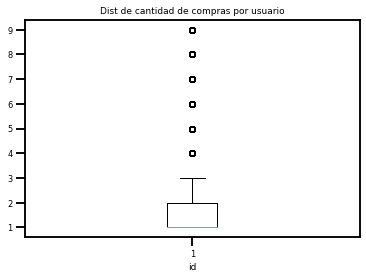

In [97]:
plt.boxplot(compras_usuario)
plt.title("Dist de cantidad de compras por usuario")
plt.xlabel("id")
plt.show()
## En un periodo de un año, la mediana de compra es de una compra, solo algunos casos compran 2 o 3 veces

In [22]:
#Vemos la cantidad de apariciones de estados de pagos
tp_arg_2017.order_status.value_counts()

paid                   59941
grand_total_is_zero     4997
refunded                 501
partially_refunded       477
pending                  421
partially_paid             2
Name: order_status, dtype: int64

In [105]:
#Dejamos el dataset sin grand_total_is_zero
tp_arg_2017 = tp_arg_2017.loc[tp_arg_2017['order_status'].isin(['paid', 'pending', 'refunded','partially_refunded','autorized','partially_paid'])]
#Dejo el otro tambien
tp_h = tp_h.loc[tp_h['order_status'].isin(['paid', 'pending', 'refunded','partially_refunded','autorized','partially_paid'])]
tp_h.shape

(61342, 18)

In [24]:
tp_arg_2017.brand.value_counts()

importada                        22198
Stella Artois                    12867
Patagonia Brewing Co.             9881
BevyBar                           8712
Corona                            6952
Cervecería y Maltería Quilmes      732
Name: brand, dtype: int64

In [25]:
tp_arg_2017.category.value_counts()

Mixed Pack      31777
Beer            22080
Merchandise      6430
Wine              678
Spirits           205
unknown           128
Home Brewing       44
Name: category, dtype: int64

In [26]:
##Aca ya queda el dataset
tp_arg_2017 = tp_arg_2017.loc[tp_arg_2017['category'].isin(['Mixed Pack', 'Beer', 'Merchandise','unknown'])]
tp_arg_2017.shape

(60415, 30)

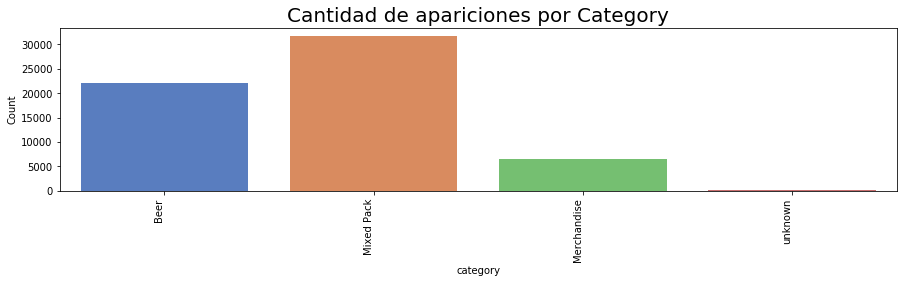

In [27]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="category",data= tp_arg_2017, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de apariciones por Category',size = 20)
plt.xlabel("category")
plt.ylabel("Count")
plt.show()

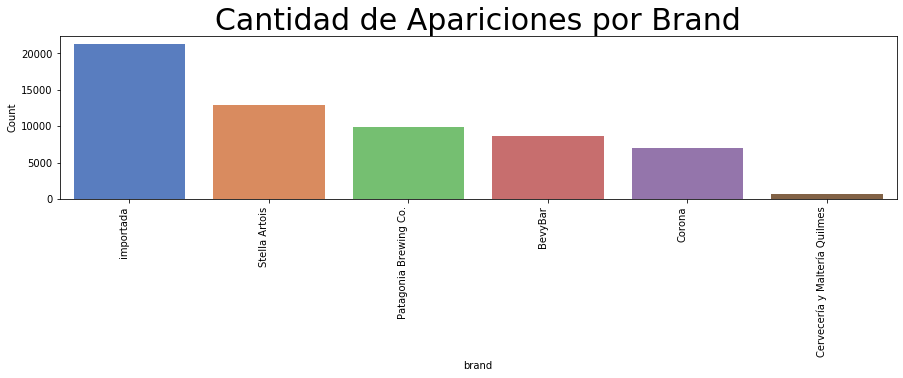

In [28]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="brand",data=tp_arg_2017, palette = "muted", order = tp_arg_2017['brand'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de Apariciones por Brand',size = 30)
plt.xlabel("brand")
plt.ylabel("Count")
plt.show()

In [31]:
#Me fijo las cantidades totales de categoría por todos los meses. Sería mejor ver año por año mas que la suma de todes
tp_pivot_cat = pd.pivot_table(data = tp_h, values = ['quantity'], index = ['month'], columns = ['category'], aggfunc= np.sum, )
tp_pivot_cat

quantity                                                           
category     Beer Home Brewing Merchandise Mixed Pack Spirits   Wine unknown
month                                                                       
1          4370.0          NaN       719.0     1415.0    31.0   57.0    20.0
2          2923.0          NaN      2635.0     2620.0    24.0   63.0     5.0
3          5689.0          NaN      1161.0     2562.0    17.0   85.0    18.0
4          5005.0         11.0       451.0     2039.0    19.0   54.0    34.0
5          2425.0          7.0       653.0     4910.0    34.0  123.0    22.0
6         11020.0         12.0       964.0     2770.0    23.0  107.0    19.0
7          6044.0          4.0       734.0     3237.0    15.0   80.0    93.0
8          2035.0          1.0       413.0      883.0     3.0   34.0     5.0
9          6593.0          2.0      1206.0     3491.0    25.0  127.0     4.0
10         3821.0         10.0       556.0     4566.0    17.0   46.0     2.0
11         3603.0          NaN       405.0     5947.0    13.0   68.0     3.0
12         7139.0          NaN       971.0     4935.0    17.0   43.0     4.0

In [32]:
#Idem anterior pero por marca
tp_pivot_brand = pd.pivot_table(data = tp_h, values = ['quantity'], index = ['month'], columns = ['brand'], aggfunc= np.sum, )
tp_pivot_brand

quantity                                                      \
brand      2km Absolut Anchor Brewing Company Antigua Aura Bacardi   
month                                                                
1          NaN     2.0                    NaN     NaN  6.0     NaN   
2          NaN     1.0                    NaN     NaN  5.0     1.0   
3          NaN     1.0                    NaN     NaN  3.0     1.0   
4          NaN     3.0                    NaN     NaN  3.0     NaN   
5          NaN     NaN                    NaN     NaN  1.0     NaN   
6          1.0     NaN                    NaN     NaN  NaN     NaN   
7          1.0     NaN                    NaN     NaN  NaN     NaN   
8          NaN     NaN                    NaN     NaN  NaN     NaN   
9          NaN     NaN                    NaN     NaN  NaN     NaN   
10         NaN     NaN                    5.0     NaN  NaN     NaN   
11         NaN     NaN                   29.0     9.0  NaN     NaN   
12         NaN     NaN                   62.0   101.0  NaN     NaN   

                                                              ...              \
brand Backus y Johnston Baltika Breweries Barba Roja Barceló  ... Tinto Negro   
month                                                         ...               
1                  11.0              21.0       23.0     4.0  ...         2.0   
2                  11.0               NaN        9.0     2.0  ...         2.0   
3                 159.0               3.0        1.0     1.0  ...         2.0   
4                  54.0              59.0        NaN     2.0  ...         3.0   
5                  19.0              14.0        NaN    10.0  ...         7.0   
6                  24.0               NaN        NaN     5.0  ...         NaN   
7                  76.0               7.0        NaN     1.0  ...         4.0   
8                   1.0               NaN        NaN     1.0  ...         5.0   
9                  44.0              85.0        NaN     1.0  ...         4.0   
10                 45.0              38.0        NaN     2.0  ...         1.0   
11                 18.0              20.0        NaN     5.0  ...         7.0   
12                 21.0              36.0        NaN     NaN  ...         NaN   

                                                                               \
brand Traslapiedra Tres14 Tsingtao Weidmann Whyte & Mackay Xoriguer Zillertal   
month                                                                           
1              1.0    1.0     20.0      NaN            1.0      1.0       NaN   
2              2.0    4.0     36.0      NaN            NaN      3.0       NaN   
3              4.0    2.0     15.0      NaN            NaN      NaN       NaN   
4              1.0    1.0     24.0      NaN            4.0      NaN      27.0   
5              3.0    NaN     22.0      NaN            3.0      2.0      24.0   
6              4.0    NaN      6.0      NaN            2.0      1.0     243.0   
7              1.0    NaN      NaN      NaN            1.0      NaN      64.0   
8              NaN    NaN      NaN      NaN            NaN      1.0      29.0   
9              5.0    NaN      NaN      NaN            1.0      3.0      12.0   
10             NaN    NaN      NaN      NaN            2.0      2.0       NaN   
11             1.0    NaN      NaN      1.0            2.0      NaN       NaN   
12             7.0    NaN      NaN      NaN            3.0      1.0       NaN   

                           
brand unknown Águila Real  
month                      
1         3.0         1.0  
2         1.0         1.0  
3         1.0         NaN  
4         1.0         NaN  
5        20.0         NaN  
6         8.0         NaN  
7        11.0         NaN  
8         NaN         NaN  
9         2.0         3.0  
10        NaN         NaN  
11        1.0         NaN  
12        1.0         NaN  

[12 rows x 97 columns]

In [33]:
#esta sería la pivot de las pivots, la idea es ver todo por mes para saber mejor la distribución
tp_pivot_two = pd.pivot_table(data = tp_h, values = ['quantity'], index = ['month'], columns = ['brand', 'category'], aggfunc= np.sum, )
tp_pivot_two
#budweiser tiene todo unknown, y patagonia solo se compró mixed pack por ej.

quantity                                                    \
brand         2km Absolut Anchor Brewing Company            Antigua   
category     Wine Spirits                   Beer Mixed Pack    Beer   
month                                                                 
1             NaN     2.0                    NaN        NaN     NaN   
2             NaN     1.0                    NaN        NaN     NaN   
3             NaN     1.0                    NaN        NaN     NaN   
4             NaN     3.0                    NaN        NaN     NaN   
5             NaN     NaN                    NaN        NaN     NaN   
6             1.0     NaN                    NaN        NaN     NaN   
7             1.0     NaN                    NaN        NaN     NaN   
8             NaN     NaN                    NaN        NaN     NaN   
9             NaN     NaN                    NaN        NaN     NaN   
10            NaN     NaN                    1.0        4.0     NaN   
11            NaN     NaN                   19.0       10.0     7.0   
12            NaN     NaN                   61.0        1.0    83.0   

                                                                         ...  \
brand                  Aura Bacardi Backus y Johnston Baltika Breweries  ...   
category Mixed Pack Spirits Spirits              Beer              Beer  ...   
month                                                                    ...   
1               NaN     6.0     NaN              11.0              21.0  ...   
2               NaN     5.0     1.0              11.0               NaN  ...   
3               NaN     3.0     1.0             159.0               3.0  ...   
4               NaN     3.0     NaN              54.0              59.0  ...   
5               NaN     1.0     NaN              19.0              14.0  ...   
6               NaN     NaN     NaN              24.0               NaN  ...   
7               NaN     NaN     NaN              76.0               7.0  ...   
8               NaN     NaN     NaN               1.0               NaN  ...   
9               NaN     NaN     NaN              44.0              85.0  ...   
10              NaN     NaN     NaN              45.0              38.0  ...   
11              2.0     NaN     NaN              18.0              20.0  ...   
12             18.0     NaN     NaN              21.0              36.0  ...   

                                                                      \
brand    Tsingtao Weidmann Whyte & Mackay Xoriguer Zillertal unknown   
category     Beer     Beer        Spirits  Spirits      Beer    Beer   
month                                                                  
1            20.0      NaN            1.0      1.0       NaN     1.0   
2            36.0      NaN            NaN      3.0       NaN     NaN   
3            15.0      NaN            NaN      NaN       NaN     1.0   
4            24.0      NaN            4.0      NaN      27.0     NaN   
5            22.0      NaN            3.0      2.0      24.0     NaN   
6             6.0      NaN            2.0      1.0     243.0     6.0   
7             NaN      NaN            1.0      NaN      64.0     8.0   
8             NaN      NaN            NaN      1.0      29.0     NaN   
9             NaN      NaN            1.0      3.0      12.0     NaN   
10            NaN      NaN            2.0      2.0       NaN     NaN   
11            NaN      1.0            2.0      NaN       NaN     NaN   
12            NaN      NaN            3.0      1.0       NaN     NaN   

                                                     
brand                                   Águila Real  
category Merchandise Mixed Pack Spirits     Spirits  
month                                                
1                1.0        NaN     1.0         1.0  
2                NaN        NaN     1.0         1.0  
3                NaN        NaN     NaN         NaN  
4                NaN        NaN     1.0         NaN  
5     

In [104]:
#Hago 3 datasets que agrupen por, mes y día c/u, así podemos ver la variación, Quedaría mejor con barras
tp_by_month = tp_h.groupby(['month']).sum() 
tp_by_day = tp_h.groupby(['day']).sum() 

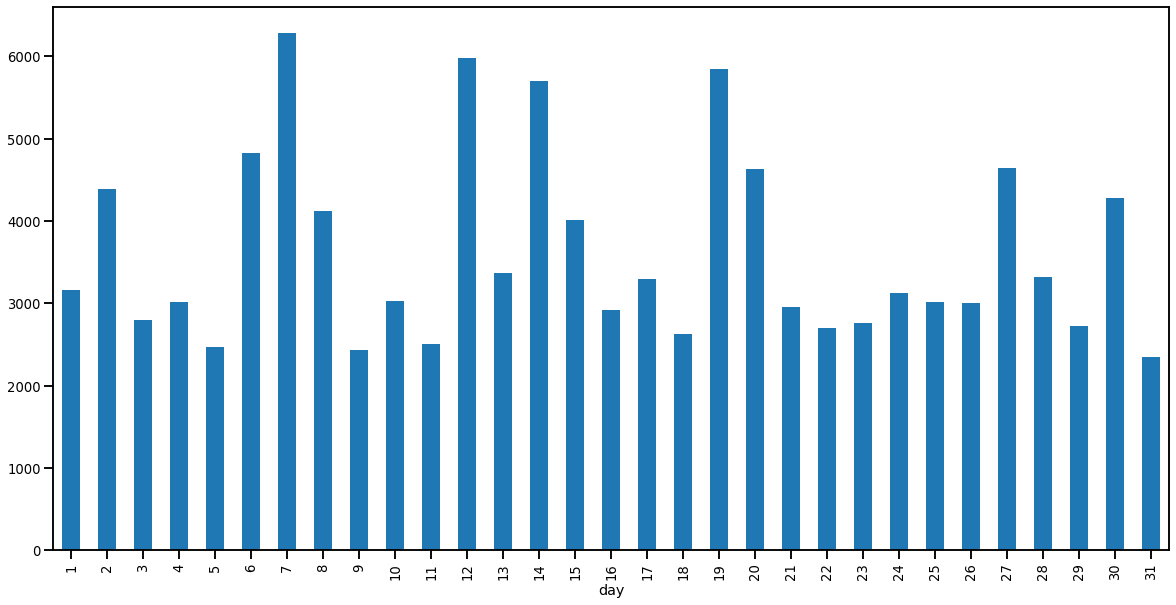

In [36]:
tp_by_day.quantity.plot.bar(figsize=(20,10))

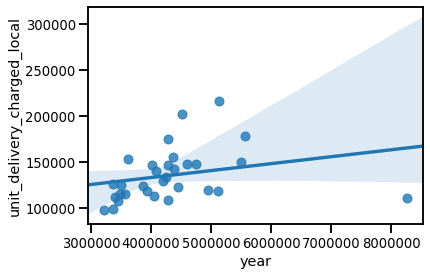

In [37]:
##VER QUE PODEMOS COMPARAR CON ESTE GRAFICO, el area sale price, deberia cambiarse x otra cosa (MARCA VS QUANTITY)
##sns.lmplot(x="KitchenQual", y="SalePrice", data=df_train)
area_sale_price = tp_by_day[['year', 'unit_delivery_charged_local']]
area_sale_price.corr()
sns.regplot(x='year', y='unit_delivery_charged_local', data= area_sale_price);

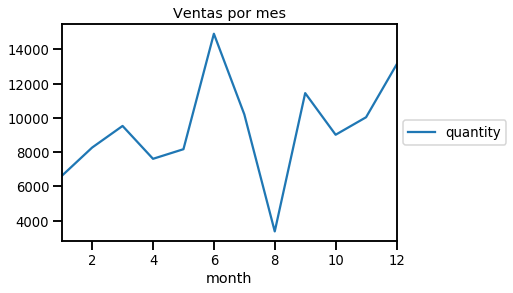

In [38]:
sns.set_context("talk", font_scale=0.8)
tp_by_month[('quantity')].plot(title = "Ventas por mes" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [41]:
#La idea ahora es ver si hay estacionalidad en algún mes con respecto a una marca (elegí las mas importantes)
#Primero filtramos por marca
tp_corona = tp_h.loc[tp_h['brand'] == 'Corona']
tp_importada = tp_h.loc[tp_h['brand'] == 'importada']
tp_Stella = tp_h.loc[tp_h['brand'] == 'Stella Artois']
tp_Patagonia = tp_h.loc[tp_h['brand'] == 'Patagonia Brewing Co.']
tp_BevyBar = tp_h.loc[tp_h['brand'] == 'BevyBar']

In [42]:
#No recuerdo si hacer este paso es necesario o no, lo dejo por las dudas.
tp_corona.groupby(['month'])['quantity'].sum()
tp_importada.groupby(['month'])['quantity'].sum()
tp_Stella.groupby(['month'])['quantity'].sum()
tp_Patagonia.groupby(['month'])['quantity'].sum()
tp_BevyBar.groupby(['month'])['quantity'].sum()

month
1      280
2      275
3      305
4      499
5     1913
6      930
7      757
8      137
9      165
10    1740
11    1715
12    1747
Name: quantity, dtype: int64

In [43]:
#Segundo agrupamos por mes y sumamos. Acá estaría creando varios datasets, tal vez no es necesario.
tp_BevyBar_month = tp_BevyBar.groupby(['month']).sum()
tp_Patagonia_month = tp_Patagonia.groupby(['month']).sum()
tp_importada_month = tp_importada.groupby(['month']).sum()
tp_Stella_month = tp_Stella.groupby(['month']).sum()
tp_Corona_month = tp_corona.groupby(['month']).sum()

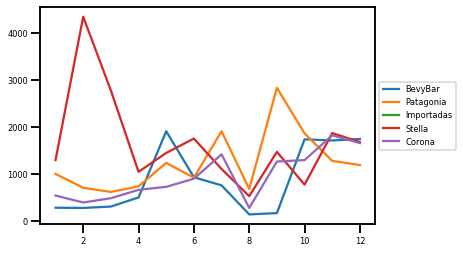

In [44]:
#visualizamos la variación por mes de cada una. Con barras tal vez quede mas lindo.
sns.set_context("talk", font_scale=0.5)
plt.plot(tp_BevyBar_month['quantity'], label='BevyBar')
plt.plot(tp_Patagonia_month['quantity'], label='Patagonia')
plt.plot(tp_importada_month['quantity'], label='Importadas')
plt.plot(tp_Stella_month['quantity'], label='Stella')
plt.plot(tp_Corona_month['quantity'], label='Corona')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#deberíamos hacer lo mismo pero 1 para cada año.

In [106]:
#Sale ese filtrado por categoría. Hago lo mismo que para Brand pero ahora con category.
tp_beer = tp_h.loc[tp_h['category'] == 'Beer']
tp_pack = tp_h.loc[tp_h['category'] == 'Mixed Pack']
tp_Merchandise = tp_h.loc[tp_h['category'] == 'Merchandise']

In [107]:
tp_beer_month = tp_beer.groupby(['month']).sum()
tp_Merchandise_month = tp_Merchandise.groupby(['month']).sum()
tp_pack_month = tp_pack.groupby(['month']).sum()

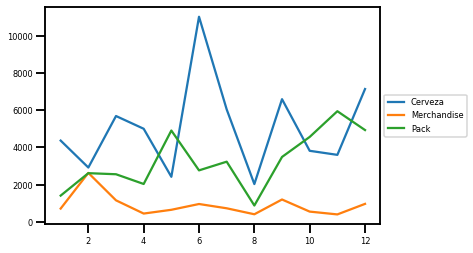

In [49]:
#visualizamos la variación por mes de cada una. Con barras tal vez quede mas lindo.
sns.set_context("talk", font_scale=0.5)
plt.plot(tp_beer_month['quantity'], label='Cerveza')
plt.plot(tp_Merchandise_month['quantity'], label='Merchandise')
plt.plot(tp_pack_month['quantity'], label='Pack')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#Nuevamente, habría que hacer lo mismo pero para cada año (un plot para 2016, otro 2017 y otro 2018)

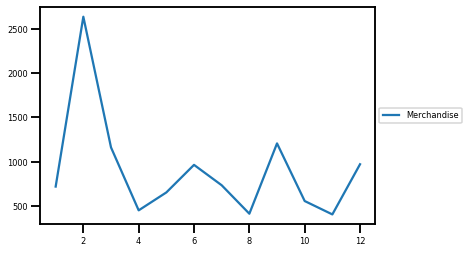

In [50]:
#Analizo Merchandise por separado
plt.plot(tp_Merchandise_month['quantity'], label='Merchandise')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [51]:
#Acá la idea es mostrar en qué meses se gasta más (y ver si hay relación con la quantity)
tp_by_month['unit_net_revenue_local']

month
1     1.057838e+06
2     2.349522e+06
3     2.052549e+06
4     1.930307e+06
5     3.612969e+06
6     2.535229e+06
7     2.619031e+06
8     6.925719e+05
9     2.829780e+06
10    3.763939e+06
11    5.282596e+06
12    4.828363e+06
Name: unit_net_revenue_local, dtype: float64

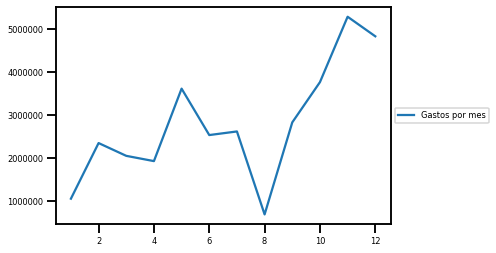

In [52]:
plt.plot(tp_by_month['unit_net_revenue_local'], label='Gastos por mes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [108]:
tp_by_brand = tp_h.groupby(['brand']).sum()
tp_by_brand

,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,year,month,day
brand,,,,,,,,
2km,1.057438e+03,980.0,7.743840e+01,2,8.194059e+02,4034,13,46
Absolut,2.791727e+03,2578.0,2.201237e+02,6,2.111854e+03,12102,18,88
Anchor Brewing Company,3.430731e+04,28330.0,3.586832e+03,95,2.595550e+04,143207,819,1258
Antigua,3.556116e+04,26707.0,4.792299e+03,110,2.569465e+04,119003,699,763
Aura,1.117443e+04,10003.0,7.366035e+02,18,8.436285e+03,34289,41,280
Bacardi,3.021963e+02,290.0,1.219630e+01,2,2.266048e+02,4034,5,18
Backus y Johnston,3.217141e+04,24172.0,2.760680e+03,271,2.450324e+04,302550,970,2480
Baltika Breweries,2.507779e+04,19866.0,2.630758e+03,269,1.901813e+04,373145,1420,2625
Barba Roja,1.508440e+03,1032.0,1.668322e+02,32,1.134551e+03,48408,32,457


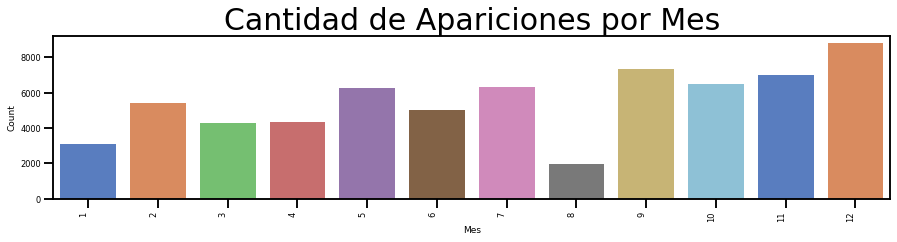

In [55]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="month", data=tp_h, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de Apariciones por Mes',size = 30)
plt.xlabel("Mes")
plt.ylabel("Count")
plt.show()

In [56]:
##Usar solo 2017?
#Ver correlacion entre compradores recurrentes y algun producto en particular
#Clusterizar los que generan compras recurrentes

In [57]:
#Borrar budweiser
#Usar solo 2017
#Juntar Bevybar y craftsociety
#Usar mas boxplot
#1° Definir 2017, las features finales finales
#2a-Regresion de 2017, predecir y comparar con enero 2018
#2-Clustering: armar el clustering y hacer un eda de los clusters
#2b
#Regresion, lineas de tiempo, etc --> Ver si podemos aplicarlo y ver si alguna marca esta creciendo, o no


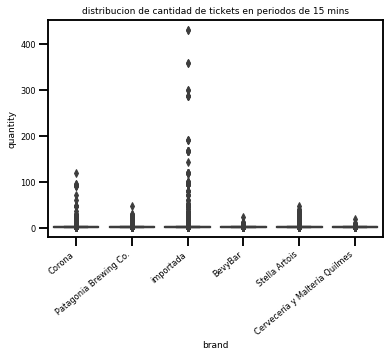

In [58]:
ay = sns.boxplot(x = tp_arg_2017.brand, y = tp_arg_2017.quantity, data = tp_arg_2017)
ay.set_xticklabels(ay.get_xticklabels(), rotation=40, ha="right")
plt.title("distribucion de cantidad de tickets en periodos de 15 mins")
plt.show()

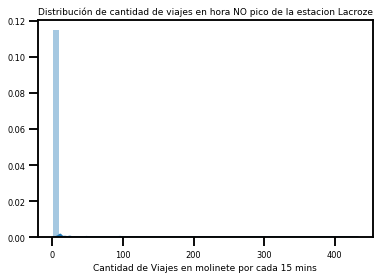

In [59]:
sns.distplot((tp_arg_2017['quantity']))
plt.title('Distribución de cantidad de viajes en hora NO pico de la estacion Lacroze')
plt.xlabel('Cantidad de Viajes en molinete por cada 15 mins')
plt.show()

# -----------------------------------------Clustering------------------------------------------------

In [189]:
##CLUSTERING
#Pase la order_time a int pero igual tira error asi que la saco tambien
#Limpio variables
tp_cluster = tp_h.drop(['order_time','name','id','customer_spk','country','order_date','order_status','subcategory'], axis=1)
#tp_cluster['order_time'] = pd.to_datetime(tp_cluster['order_time']).astype(np.int64)
tp_cluster1= tp_cluster.loc[tp_h['brand'].isin(['Corona', 'Patagonia Brewing Co.','importada', 'BevyBar','Stella Artois', 'Cervecería y Maltería Quilmes'])]
tp_cluster1.head(5)

,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,brand,category,year,month,day
17162,1030.0,890.0,140.0,1,788.0530,Corona,Beer,2017,9,20
17165,631.0,432.0,199.0,1,493.6944,Patagonia Brewing Co.,Mixed Pack,2017,6,13
17176,910.0,1011.0,49.0,1,698.5160,BevyBar,Mixed Pack,2017,7,30
17182,820.0,690.0,130.0,1,627.3820,Stella Artois,Mixed Pack,2017,9,24
17189,314.0,209.0,105.0,1,235.7826,Stella Artois,Merchandise,2017,2,14


In [190]:
#Genero dummies de brand y category
brands = pd.get_dummies(tp_cluster1.brand)
category = pd.get_dummies(tp_cluster1.category)
tp_cluster1 = pd.concat([tp_cluster1,brands,category],axis=1)
tp_cluster1 = tp_cluster1.drop(['brand','category'], axis=1)

In [196]:
#AutoScaling
scaler = preprocessing.StandardScaler().fit(tp_cluster1)
xscal = scaler.transform(tp_cluster1)

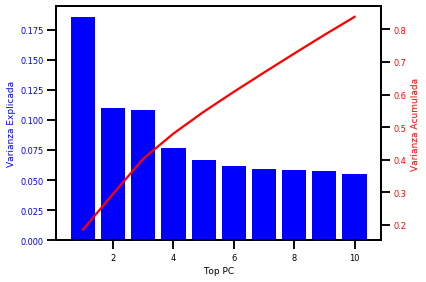

In [197]:
# Generamos el PCA
import matplotlib.cm as cm
from sklearn import decomposition

n_comps = 10
components = range(1,n_comps + 1)
pca = decomposition.PCA(n_components=n_comps)
pca.fit(xscal)
xpca = pca.transform(xscal)
eigenvalues = pca.explained_variance_ratio_
eigenvalues_acum = pca.explained_variance_ratio_.cumsum() 

#Visualizo autovalores
fig, ax1 = plt.subplots()
ax1.set_xlabel('Top PC')
ax1.set_ylabel('Varianza Explicada', color='blue')
ax1.bar(components, eigenvalues, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()  
ax2.set_ylabel('Varianza Acumulada', color='red')  
ax2.plot(components, eigenvalues_acum, color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()  
plt.show()

In [198]:
#Encontramos que con 10 PC explicamos el 90% de la varianza
#Como las primeras 4 componentes explican el 50% de la varianza utilizamos 4 dimensiones.

reduced_dim = 3
xpca_rd = xpca[:,0:reduced_dim]
kmeans_rd = KMeans(n_clusters=3, random_state=10).fit(xpca_rd)
# una vez realizado el clustering, observamos las labels de cluster asignadas a cada muestra
kmeans_rd.labels_ = kmeans_rd.labels_
kmeans_rd.labels_
# visualizamos los centroides finales de cada cluster
centers_rd = kmeans_rd.cluster_centers_
centers_rd


array([[ 0.66166331, -0.32647912, -0.50868749],
       [-1.99053731,  0.69109973,  0.94914569],
       [ 6.6267665 ,  1.12911795,  3.68852335]])

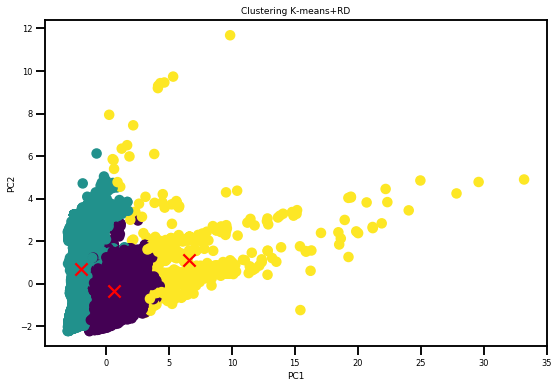

In [199]:
# K-Means + RD (Con las 3 primeras PC)
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd[:,0],xpca_rd[:,1],c=kmeans_rd.labels_.astype(float))
plt.scatter(centers_rd[:,0], centers_rd[:,1], marker="x", color='r',s=150)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering K-means+RD')
plt.show()

In [200]:
sill_score_rd = silhouette_score(xpca,kmeans_rd.labels_)
print(sill_score_rd)

0.2968035424905324


In [68]:
#Con 4 PC y 5 clusters obtenemos un silhouette de 48%
#Con 4 PC y 5 clusters obtenemos un silhouette de 44%
#Con 3 PC y 3 clusters obtenemos un silhouette de 49%

In [69]:
#Clustering de importadas
tp_importadas = tp_arg_2017.loc[tp_arg['brand'].isin(['Cervecería Antares','Flensburger Brauerei','Fábricas Nacionales De Cerveza', 'Fabricas Nacionales De Cerveza', 'Cerveceria Artesanal El Bolson', 'Peñón del Águila', 'Leffe', 'Spaten-Franziskaner-Bräu', 'BBC', 'Cervecería Artesanal El Bolson',
       'Anchor Brewing Company', 'Bass Brewery', 'Hofbräu München',
       'Adnams', "Fuller's", 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0',
       'Brouwerij Van Steenberge', 'Hoegaarden',
       'Fuegian Beverage Company',
       'De La Vaca Tranquila Cervezas Artesanales', 'Tsingtao',
       'Löwenbräu', 'unknown', 'Barba Roja', 'Coopers Brewery',
       'Backus y Johnston', 'Brauerei Beck & Co', 'MixxTail', 'Shock Top',
       'Bogotá Beer Company',
       'Czechvar', 'Belle-Vue', 'Paulaner Brauerei München',
       'Duvel Moortgat', 'Zillertal', 'Baltika Breweries', 'Chimay',
       'Kronenbourg 1664', 'Kulmbacher Brauerei AG', 'Grimbergen',
       'Maredsous',
       'franziskaner', 'Condeminal', 'Erdinger Weissbräu',
       'Brasserie de Silly', 'SAB Miller','Bodega Budeguer',
       'Skol', 'Belsh', 'OETTINGER Brauerei GmbH', 'Águila Real', 'Hertog Jan', 'Manos Negras', 'Freixenet',
       'The Fran-C Wines', 'Finca Ferrer', 'Bodega Renacer', 'Oranjeboom',
       'Maal Wines', 'Tinto Negro', 'Corbeau Wines',
       'Mosquita Muerta Wines', 'Bodega del Desierto', 'Antigua',
       'Boris Biere', 'Barceló', 'Boddingtons', 'Bombay', 'Jägermeister',
       'Revancha', 'Huentala Wines', 'Bodega Cruz Primero', 'Aura',
       'Harvierstoun', 'Chivas Regal', 'Weidmann', 'Isle of Jura', 'Belenkaya',
       '2km', "Jack Daniel's", 'Johnnie Walker', 'Whyte & Mackay',
       'The Patrón Spirits Company', 'Amarula', 'Havana Club',
       'Matías Riccitelli', 'Mulata', 'Rye', 'Mundo Revés', 'Brahma',
       'Bodega José Luis Mounier', 'José Cuervo', 'Jim Beam', 'Bier Life',
       'Makers Mark', 'Mistral', 'Príncipe de los Apóstoles',
       'Flor de Caña', 'Bacardi', 'Absolut', 'Pravda', 'Greene King',
       'SKYY', 'Hennessy', 'Noctua', 'Jameson', 'Traslapiedra',
       'Bodega Ojo de Vino', 'Tres14', 'Velho Barreiro', 'Van Pur',
       'SIAM', 'Beluga', 'Bottega', 'Campari', 'The Glenrothes',
       'Cinzano', 'Xoriguer', 'El Jimador', 'Kahlúa', 'Malibu', 'Aperol',
       'The Botanist', 'Brasserie de Luxemburgo Mousel - Diekrich',
       'The Famous Grouse', 'MG Destilerías', 'Grand Marnier',
       'Cointreau', 'Finca Beth', 'The Mula Cervezas Especiales',
       'Anima Mundi'])]

In [70]:
tp_importadas.shape

(21315, 30)

In [71]:
#Genero dummies de brand
brands_i = pd.get_dummies(tp_importadas.brand)
category_i = pd.get_dummies(tp_importadas.category)
tp_cluster2 = pd.concat([tp_importadas,brands_i,category_i],axis=1)
tp_cluster2 = tp_cluster2.drop(['brand','category'], axis=1)
tp_cluster2.head(3)

,country,id,unit_discount_usd,customer_first_order_date,unit_gross_revenue_local,unit_delivery_charged_usd,unit_net_revenue_usd,order_date,order_status,customer_spk,...,name,subcategory,year,month,day,importada,Beer,Merchandise,Mixed Pack,unknown
17174,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",2.7181,2016-09-30,234.6542,0.8879,10.6267,2017-02-28,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,...,Cerveza Peñón del Águila Kölsch,unknown,2017,2,28,1,1,0,0,0
17175,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",1.8052,2016-09-30,155.8458,0.5897,7.0578,2017-02-28,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,...,Cerveza Peñón del Águila Kölsch,unknown,2017,2,28,1,1,0,0,0
17177,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",2.7181,2016-09-30,234.6542,0.8879,10.6267,2017-02-28,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,...,Cerveza Peñón del Águila Honigbier,unknown,2017,2,28,1,1,0,0,0


In [72]:
tp_cluster2 = tp_cluster2.drop(['country','id','unit_gross_revenue_usd','order_time','order_date','order_status', 'source_system_order_id', 'rate_local_do_usd', 'order_days_after_first_order', 'unit_price_charged_usd', 'unit_discount_usd', 'customer_first_order_date', 'unit_delivery_charged_usd', 'unit_net_revenue_usd', 'row_created_at', 'sku', 'date_created'], axis=1)
tp_cluster2.head(5)

,unit_gross_revenue_local,customer_spk,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,name,subcategory,year,month,day,importada,Beer,Merchandise,Mixed Pack,unknown
17174,234.6542,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,265.0,14.7222,1,176.2018,Cerveza Peñón del Águila Kölsch,unknown,2017,2,28,1,1,0,0,0
17175,155.8458,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,44.0,9.7778,4,117.0246,Cerveza Peñón del Águila Kölsch,unknown,2017,2,28,1,1,0,0,0
17177,234.6542,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,265.0,14.7222,1,176.2018,Cerveza Peñón del Águila Honigbier,unknown,2017,2,28,1,1,0,0,0
17178,155.8458,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,44.0,9.7778,4,117.0246,Cerveza Peñón del Águila Honigbier,unknown,2017,2,28,1,1,0,0,0
18838,65.6089,ar_bevybar;562e7ce53ffad79389bb40b8e6df58b9310...,70.0,4.2189,1,51.3324,Cerveza Bass Pale Ale,unknown,2017,6,27,1,1,0,0,0


In [73]:
#AutoScaling
scaler = preprocessing.StandardScaler().fit(tp_cluster2)
##Hacer clustering sobre este xscal
xscal = scaler.transform(tp_cluster2)
#PCA sobre los clusters para visualizarlo
#Crear 3 datasets por las etiquetas de los clusters y hacer un displot o boxplot de alguna de las variables


ValueError: could not convert string to float: 'ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f91d38575006c8a7ba98f574e71ac34'

In [ ]:
# Generamos el PCA
import matplotlib.cm as cm
from sklearn import decomposition

n_comps = 10
components = range(1,n_comps + 1)
pca = decomposition.PCA(n_components=n_comps)
pca.fit(xscal)
xpca = pca.transform(xscal)
eigenvalues = pca.explained_variance_ratio_
eigenvalues_acum = pca.explained_variance_ratio_.cumsum() 

#Visualizo autovalores
fig, ax1 = plt.subplots()
ax1.set_xlabel('Top PC')
ax1.set_ylabel('Varianza Explicada', color='blue')
ax1.bar(components, eigenvalues, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()  
ax2.set_ylabel('Varianza Acumulada', color='red')  
ax2.plot(components, eigenvalues_acum, color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()  
plt.show()

In [ ]:
#Encontramos que con 2 PC explicamos el 60% de la varianza
reduced_dim = 2
xpca_rd = xpca[:,0:reduced_dim]
kmeans_rd = KMeans(n_clusters=3, random_state=10).fit(xpca_rd)
# una vez realizado el clustering, observamos las labels de cluster asignadas a cada muestra
kmeans_rd.labels_ = kmeans_rd.labels_
kmeans_rd.labels_
##Concatenar las labels a cada sample

In [ ]:
# visualizamos los centroides finales de cada cluster
centers_rd = kmeans_rd.cluster_centers_
centers_rd


In [ ]:
# K-Means + RD (Con las 2 primeras PC)
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd[:,0],xpca_rd[:,1],c=kmeans_rd.labels_.astype(float))
plt.scatter(centers_rd[:,0], centers_rd[:,1], marker="x", color='r',s=150)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-means+RD')
plt.show()

In [ ]:
sill_score_rd = silhouette_score(xpca_rd,kmeans_rd.labels_)
print(sill_score_rd)

In [ ]:
#Haciendo clustering con las importadas encontramos distribuciones
#similares a las vistas solo para las marcas core de negocio, pero con un Silhouette mucho mas alto
#OJO QUE USE LAS MISMAS VARIABLES, DEL SCALER EN ADELANTE QUEDAN LAS DE LA SEGUNDA PARTE

In [ ]:
##Notas Martin
##Buscar borrar el id que haya hecho compras ENOOORMES que genere los outliers
##Dejar el EDA como ya esta, ponerle foco a clustering
##Hacer el clustering sobre los datos auto-escalados
##Crear 3 ( o los que sean) datasets por las etiquetas de los clusters (##Concatenar las labels a cada sample) y hacer un displot o boxplot de alguna de las variables (quantity, price)
##Si alcanza el tiempo (Aplicar PCA sobre los clusters para visualizar las componentes y blabla)